# Was Air Quality Affected in Countries or Regions Where COVID-19 was Most Prevalent?
**By: Arpit Jain, Maria Stella Vardanega, Tingting Cao, Christopher Chang, Mona Ma, Fusu Luo**

---
## Problem Definition & Data Source Description

Air pollution, as one of the most serious environmental problems confronting our civilization, is the presence of toxic gases and particles in the air at levels that pose adverse effects on global climate and lead to public health risk and disease. Exposure to elevated levels of air pollutants has been implicated in a diverse set of medical conditions including cardiovascular and respiratory mortality, lung cancer and autism. 

Air pollutants come from natural sources such as wildfires and volcanoes, as well as are highly related to human activities from mobile sources (such as cars, buses and planes) or stationary sources (such as industrial factories, power plants and wood burning fireplaces). However, in the past year, the COVID-19 pandemic has caused unprecedented changes to the our work, study and daily activities, subsequently led to major reductions in air pollutant emissions. And our team would like take this opportunity to examine the air quality in the past two years and look on how the air quality was impacted in countries and cities where the coronavirus was prevalent.

Data Source Description: In this project, we downloaded worldwide air quality data for Year 2019 and 2020 from https://aqicn.org/data-platform/covid19/, which provides historial air quality index and meteorological data for more than 380 major cities across the world. We used air quality index data in 2019 as baseline to find the air quality changes during covid in 2020. We also joined the data with geographic location inforamtion from https://aqicn.org/data-platform/covid19/airquality-covid19-cities.json to get air quality index for each pollutant at city-level. According to the data source provider, the data for each major cities is based on the average (median) of several stations. The data set provides min, max, median and standard deviation for each of the air pollutant species in the form of Air Quality Index(AQI) that are converted from raw concentration based on the US Enviromental Protectiion Agency (EPA) standard.

The United States EPA list the following as the criteria at this website. Carbon Monoxide (CO), Nitrogen Dioxide (NO2), Ozone (O3), Particle Pollution (PM2.5) + (PM10), and finally Sulfur Dioxide (SO2). https://www.epa.gov/criteria-air-pollutants/naaqs-table For the particle pollution the numbers stand for the size of the particles. PM2.5 means particles that are 2.5 micrometers and smaller, while PM10 means particles that are 10 micrometers and smaller. https://www.epa.gov/pm-pollution/particulate-matter-pm-basics. Particle Pollution typically includes Dust, Dirt, and Smoke. Our dataset covers most of the criteria pollutants (PM2.5, PM10, Ozone, SO2, NO2 and CO), and meteorological parameters such as temperature, wind speed, dew point, relative humidity. Air quality index basics are shown in the figure below. 

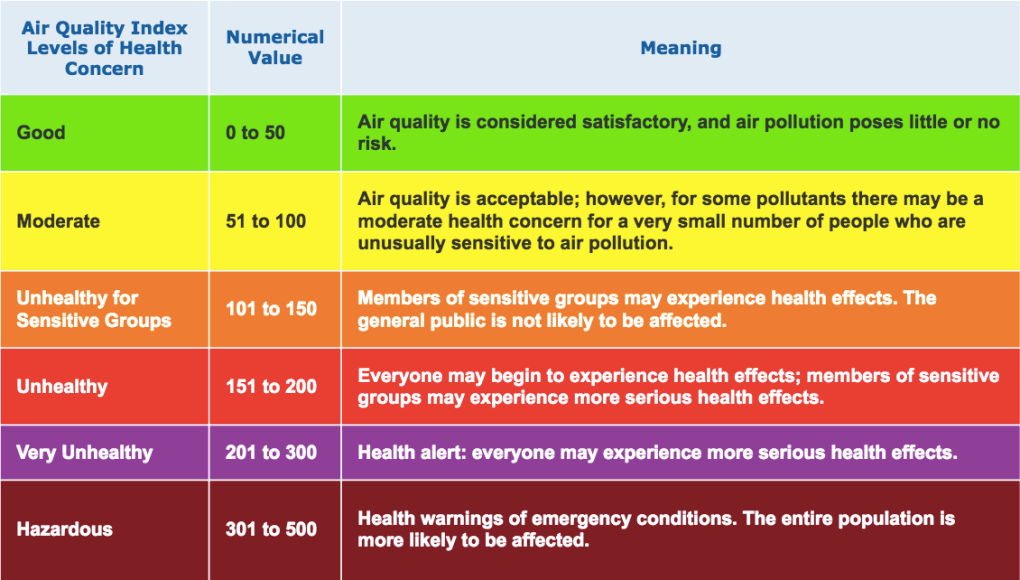

(source:airnow.gov)

### Question 1: What are the most prevalent pollutants?

This question focuses on the prevalence of the pollutants. From the dataset, the prevalence can be defined by the total count number of each parameter, or geographically from the cities and countries which had recorded the parameters detected times. 

Our team selected the parameters from each situation, by count number, by how many times cities and countries in total detected a parameter, and how many distinct cities and countries had the parameter appeared.  Then we inner join the 4 tables to return parameters that have matching values among all tables.  For the join table, we did not set the order because we don’t set the priorities  for each criterias.

When setting the records limitation to 12, which returns the top 12 parameters  intersected in each table, we got ‘no2’, ‘pm10’, ‘pm25’ besides those meteorological parameters as the most prevalent criteria pollutants. 

In [52]:
%%bigquery
select *  from
 
(SELECT Parameter,sum(count) as count
FROM `ba775-team2-b2.AQICN.air_quality_data`
group by Parameter
order by count desc  LIMIT 12)
 
join
(SELECT Parameter,count(City) as count_city
FROM `ba775-team2-b2.AQICN.air_quality_data`
group by Parameter
order by count_city desc  LIMIT 12)
using(Parameter)
 
join
(SELECT Parameter,count(distinct(City)) as count_distinct_city
FROM `ba775-team2-b2.AQICN.air_quality_data`
group by Parameter
order by count_distinct_city desc  LIMIT 12)
using(Parameter)
 
join
(SELECT Parameter,count(distinct(Country)) as number_of_country,
string_agg(distinct(Country)) as list_country
 
FROM `ba775-team2-b2.AQICN.air_quality_data`
group by Parameter
order by number_of_country desc LIMIT 12)
using(Parameter)


Downloading: 100%|██████████| 9/9 [00:01<00:00,  5.99rows/s]


,Parameter,count,count_city,count_distinct_city,number_of_country,list_country
0,temperature,61003220,421143,615,95,"PK,NP,UG,AR,CY,BR,HK,EC,CO,PT,BG,ID,ET,LA,JO,L..."
1,pressure,60795855,418949,614,95,"CO,PK,NP,LA,GR,BR,EC,XK,PE,PT,AE,HK,BG,EE,GN,G..."
2,humidity,60734290,421034,615,95,"AR,ID,LA,BG,ML,EE,BR,CH,JO,ET,SV,CO,PE,UG,PK,N..."
3,no2,52618373,355011,528,64,"XK,GR,HR,BG,AE,BR,MO,PT,IS,HK,JO,CO,SK,KZ,PE,A..."
4,pm10,52539981,352105,527,71,"NP,GR,MN,MK,CH,HR,HK,IS,BR,EE,BO,PE,AR,BG,SG,S..."
5,pm25,52012418,363658,548,92,"HK,PH,PK,NP,BG,CO,HR,RE,BR,IS,MN,MO,LA,SV,SK,P..."
6,wind-speed,47263844,371031,613,95,"HK,SK,CO,PK,PR,GR,ID,UG,PH,BD,RE,HR,NP,GN,PE,S..."
7,dew,30623314,314446,582,95,"ET,LA,BR,EC,MK,PK,SK,JO,AR,PH,SG,AE,NP,TM,ID,C..."
8,wind-gust,25054840,230675,586,90,"BR,EE,EC,HR,KZ,AR,PT,SK,MM,HK,BO,SV,CO,DK,PR,I..."


##### If the limitation changed to 10,  the only criteria pollutant  is ‘pm2.5’. 


In [54]:
%%bigquery
select * EXCEPT(count_city) from 
(SELECT * FROM `ba775-team2-b2.AQICN.parameter_prevalence _by_distinctCity` LIMIT 10)
join 
(SELECT * FROM `ba775-team2-b2.AQICN.parameter_prevalence _by_count` LIMIT 10)
using(Parameter)
join 
(SELECT * FROM `ba775-team2-b2.AQICN.parameter_prevalence _by_country_listed` LIMIT 10)
using(Parameter)
join 
(SELECT * FROM `ba775-team2-b2.AQICN.parameter_prevalence_by_city` LIMIT 10)
using(Parameter)

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.00rows/s]


,Parameter,number_of_country,list_country
0,humidity,95,"AE,UZ,AF,IQ,KZ,JO,MK,CI,CO,ET,HR,PK,GN,BG,AR,C..."
1,temperature,95,"KZ,HR,GE,PT,BR,GT,IQ,MK,UG,JO,PK,CI,BH,GH,SG,C..."
2,pressure,95,"GE,PT,LK,AR,BO,PR,BG,SK,CY,MO,CH,EC,JO,DK,HR,B..."
3,wind-speed,95,"PH,NP,PT,XK,KZ,TM,GN,AE,JO,HR,CY,ET,CW,BR,BH,K..."
4,dew,95,"JO,KZ,KW,ML,CY,TM,AE,EC,PK,PT,ET,RE,BR,UG,CW,G..."
5,pm25,92,"RE,GE,EC,CR,GT,PE,DK,SV,XK,AF,IS,GH,UG,MM,NP,A..."


By joining the tables from different measurements, ‘no2’, ‘pm10’, ‘pm2.5’ appeared to be the most popular criteria pollutants listed by the United States EPA. And 'pm2.5' is the most prevalent if narrowed the answer down to one pollutant. 

---

### Question 2: What were the pollutant levels in 2019 and 2020 globally, and their averages? 

The purpose of this question is to determine the air pollutant levels in 2019 and 2020. The air pollutant levels in 2019 serve as a baseline for the air pollutant levels in 2020. In the previous question we observe the distinct parameters that are within the Air Quality Database. Since the meteorological parameters are not needed for the project, we can exclude them, and only focus on the air pollutants. 

The first step is create a table where the parameters are only air pollutants and from the years 2019 and 2020. The next step was to select all the rows from each year, and that had a certain parameter, and to union them all. This process was done for all six parameters for both years. 

In [43]:
%%bigquery
SELECT Date, Country, City, lat as Latitude, lon as Longitude, pop as Population, Parameter as Pollutant, median as Pollutant_level
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE (extract(year from date) = 2019 OR extract(year from date) = 2020) AND parameter IN ('co', 'o3','no2','so2','pm10',
'pm25')
ORDER BY Country, Date;

Downloading: 100%|██████████| 1968194/1968194 [00:02<00:00, 804214.66rows/s] 


,Date,Country,City,Latitude,Longitude,Population,Pollutant,Pollutant_level
0,2019-01-01,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,122.0
1,2019-01-02,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,99.0
2,2019-01-03,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,117.0
3,2019-01-04,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,107.0
4,2019-01-05,AE,Abu Dhabi,24.45118,54.39696,603492.0,pm25,78.0
...,...,...,...,...,...,...,...,...
1968189,2020-12-31,ZA,Durban,-29.85790,31.02920,3120282.0,pm10,20.0
1968190,2020-12-31,ZA,Johannesburg,-26.20227,28.04363,2026469.0,co,3.8
1968191,2020-12-31,ZA,Johannesburg,-26.20227,28.04363,2026469.0,o3,8.1
1968192,2020-12-31,ZA,Johannesburg,-26.20227,28.04363,2026469.0,pm10,16.0


As we can see after filtering the tables for only the air pollutants we have 1.9 million rows(!). From here we split the data into 2019 data and 2020 data. 

In [41]:
%%bigquery
SELECT extract(month from date) Month, Parameter as Pollutant,Round(avg(median),2) as Avg_Pollutant_Level_2019
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('co')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2)
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('o3')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('no2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('so2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('pm10')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2019 AND parameter IN ('pm25')
GROUP BY Month, Parameter


ORDER BY Month; 

Downloading: 100%|██████████| 72/72 [00:01<00:00, 64.20rows/s] 


,Month,Pollutant,Avg_Pollutant_Level_2019
0,1,pm25,67.53
1,1,co,5.22
2,1,pm10,33.03
3,1,no2,13.74
4,1,o3,15.43
...,...,...,...
67,12,co,5.99
68,12,pm10,31.15
69,12,no2,13.35
70,12,o3,14.29


This query represents the average pollutant level for each air pollutant globally for each month. We do this again for the 2020 data. 

In [42]:
%%bigquery
SELECT extract(month from date) Month, Parameter as Pollutant,Round(avg(median),2) as Avg_Pollutant_Level_2020
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('co')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2)
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('o3')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('no2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('so2')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('pm10')
GROUP BY Month, Parameter

UNION ALL 

SELECT extract(month from date) Month, Parameter ,Round(avg(median),2) 
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE extract(year from date) = 2020 AND parameter IN ('pm25')
GROUP BY Month, Parameter


ORDER BY Month; 

Downloading: 100%|██████████| 72/72 [00:01<00:00, 51.38rows/s]


,Month,Pollutant,Avg_Pollutant_Level_2020
0,1,so2,4.99
1,1,o3,14.90
2,1,no2,12.89
3,1,pm25,68.60
4,1,pm10,31.78
...,...,...,...
67,12,o3,13.10
68,12,no2,12.15
69,12,pm25,65.90
70,12,pm10,31.22


When comparing the data there isn't a noticable difference in pollutant levels in either year, which leads to the thinking of pollutant levels being regional rather than global. This might also mean that whatever effects might be occuring from COVID-19 cases, and lockdowns are so short-term that the average monthly air pollutant is not capturing small intricacies in the data.  

---

### Question 3: When were lockdowns implemented for each country? 
#### Narrow down range for pollutant data


Lockdown Dates per Country

China: Jan 23 - April 8, 2020 (Wuhan 76 day lockdown)

USA: March 19 - April 7, 2020

Italy: March 9 - May 18, 2020

Taiwan: No lockdowns in 2020. Lockdown started in July 2021. 

Australia: March 18 - May/June 2020

New Zealand: March 25 - May/June 2020

The purpose of this question is to narrow down the dates of our pollutant data in order to compare the pollutant levels in 2019 and 2020 for the countries of China, USA, Italy, Taiwan, Australia, and New Zealand, which is calculated in question 4. This was done by first finding the respective lockdown periods for the countries listed, then coming to a conclusion that most lockdown periods were from mid march to April, May, or June, except for China, which started their lockdown late January until April of 2020. To generalize the lockdown dates for countries other than China, the SQL query included dates from the beginning of March to the end of June. As for China, the query included specific dates from January 23 to April 8th of 2020, which is the Wuhan 76 day lockdown. 

In [58]:
%%bigquery
SELECT country, parameter, AVG(count) AS air_quality
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE date BETWEEN '2020-03-01' AND '2020-06-30'
AND country in ('US','IT','AU','NZ','TW')
GROUP BY country, parameter
limit 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.69rows/s]


,country,parameter,air_quality
0,AU,neph,109.348361
1,AU,co,47.130664
2,AU,o3,79.937695
3,AU,wd,134.570833
4,AU,dew,49.071358
5,AU,no2,84.983287
6,AU,so2,44.488290
7,AU,pm10,114.445365
8,AU,pm25,107.541070
9,AU,humidity,124.819549


In [10]:
%%bigquery
SELECT country, parameter, AVG(count) AS air_quality
FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE date BETWEEN '2020-01-23' AND '2020-04-08'
AND country = 'CN'
GROUP BY country, parameter
limit 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.49rows/s]


,country,parameter,air_quality
0,CN,aqi,185.515625
1,CN,co,205.973645
2,CN,o3,221.181323
3,CN,dew,159.746586
4,CN,no2,239.843876
5,CN,so2,189.515562
6,CN,pm10,216.375753
7,CN,pm25,241.229167
8,CN,humidity,209.312384
9,CN,pressure,209.621053


---

## Question 4: How did Air Quality change in countries with low COVID-19 cases (NZ, AUS, TW) and high COVID-19 cases (US, IT,CN)?
This question was answered by creating separate tables that encompassed the equivalent lockdown periods per country for 2019. Then, the two tables were joined using the parameter and grouped according to country and parameter to create a subsequent table illustrating the percentage change in average pollution from 2019 to 2020 (during the respective lockdown periods). 

In [12]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_Italy AS
    SELECT country, parameter, count AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-09' AND '2019-05-18'
    AND country = 'IT'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1769.25query/s]                        


""


In [23]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.count) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.count)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_Italy AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-09' AND '2020-05-18'
AND a2020.country = 'IT'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.58rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,IT,o3,118.919192,100.294964,0.185695
1,IT,no2,129.671875,114.777465,0.129768
2,IT,so2,79.831622,77.262887,0.033247
3,IT,pm25,102.796209,99.765830,0.030375
4,IT,pm10,101.375969,103.111682,-0.016833
5,IT,co,75.515528,81.669366,-0.075351


As can be seen from the above table the pm10 and co levels decreased by 1.68% and 7.54% respectively. This illustrates a positive change in those levels during covid. Nevertheless, there was also a 18.57% and 12.98% increase in o3 and no2 levels respectively. 

In [14]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_US AS
    SELECT country, parameter, count AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-19' AND '2019-04-07'
    AND country = 'US'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 2032.45query/s]                        


""


In [24]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.count) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.count)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_US AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-19' AND '2020-04-07'
AND a2020.country = 'US'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  3.79rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,US,pm10,80.646217,75.523517,0.067829
1,US,so2,26.701970,25.751269,0.036919
2,US,no2,76.823138,74.789189,0.027196
3,US,o3,76.138889,75.859010,0.003689
4,US,co,59.427481,59.242228,0.003127
5,US,pm25,92.565492,94.010909,-0.015375


The only pollutant level that decreased during COVID-19 was pm25, which decreased by only 1.54%.

In [16]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_China AS
    SELECT country, parameter, count AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-01-23' AND '2019-04-08'
    AND country = 'CN'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1521.70query/s]                        


""


In [25]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.count) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.count)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_China AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-01-23' AND '2020-04-08'
AND a2020.country = 'CN'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.05rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,CN,o3,221.181323,214.095920,0.033095
1,CN,pm25,241.229167,242.083797,-0.003530
2,CN,no2,239.843876,241.147089,-0.005404
3,CN,pm10,216.375753,222.591899,-0.027926
4,CN,co,205.973645,213.926582,-0.037176
5,CN,so2,189.515562,207.068861,-0.084770


In [18]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_Taiwan AS
    SELECT country, parameter, count AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE EXTRACT(month FROM date) = 07
    AND EXTRACT(year FROM date) = 2019
    AND country = 'TW'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1738.21query/s]                        


""


In [26]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.count) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.count)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_Taiwan AS a2019
USING(parameter)
WHERE EXTRACT(month FROM a2020.date) = 07
AND EXTRACT(year FROM a2020.date) = 2020
AND a2020.country = 'TW'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.00rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,TW,so2,246.870968,106.003584,1.328893
1,TW,pm10,253.881720,145.100719,0.749693
2,TW,pm25,241.354839,153.580645,0.571519
3,TW,no2,248.910394,159.824373,0.557399
4,TW,o3,227.301075,166.931900,0.361640
5,TW,co,223.655914,166.276978,0.345080


In [20]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_AUS AS
    SELECT country, parameter, count AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-25' AND '2019-05-31'
    AND country = 'NZ'

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1646.76query/s]                        


""


In [27]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.count) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.count)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_NZ AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-25' AND '2020-05-31'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
AND a2020.country = 'NZ'
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change DESC

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.43rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,NZ,no2,88.573529,76.432836,0.158841
1,NZ,so2,30.777778,28.130769,0.094097
2,NZ,pm25,54.303922,53.019900,0.024218
3,NZ,co,56.323529,63.716418,-0.116028
4,NZ,pm10,68.176471,79.049261,-0.137544


In [ ]:
%%bigquery
CREATE OR REPLACE TABLE AQICN.air_quality2019_AUS AS
    SELECT country, parameter, count AS air_quality2019 FROM `ba775-team2-b2.AQICN.air_quality_data`
    WHERE date BETWEEN '2019-03-18' AND '2019-05-31'
    AND country = 'AU'

In [28]:
%%bigquery
SELECT a2020.country, a2020.parameter, AVG(a2020.count) AS air_quality2020, AVG(air_quality2019) AS air_quality2019,
    (AVG(a2020.count)-AVG(air_quality2019))/AVG(air_quality2019) AS percentage_change
FROM `ba775-team2-b2.AQICN.air_quality_data` AS a2020
LEFT JOIN AQICN.air_quality2019_AUS AS a2019
USING(parameter)
WHERE a2020.date BETWEEN '2020-03-18' AND '2020-05-31'
AND Parameter in ('pm25','pm10','o3','no2','co','so2')
AND a2020.country = 'AU'
GROUP BY a2020.country, a2020.parameter
ORDER BY percentage_change DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.10rows/s]


,country,parameter,air_quality2020,air_quality2019,percentage_change
0,AU,pm25,109.474328,53.019900,1.064778
1,AU,so2,44.327778,28.130769,0.575776
2,AU,pm10,116.881418,79.049261,0.478590
3,AU,no2,85.287651,76.432836,0.115851
4,AU,co,47.319113,63.716418,-0.257348
5,AU,o3,80.981513,NaN,NaN


---

### Question 5: What cities had the highest changes in pollutant air quality index during COVID-19? 

In this question, we are trying to find cities with most air quality improvement during COVID, and cities with longest time of certain level AQI reduction.

a. Making queries and creating tables to find monthly average air quality index (AQI) for all pollutants at city level, using data in 2019 as baseline and computing AQI differnces and percent differnces. Negative difference values indicates air quality index decrease, correspoinding to an air quality improvement.

In [1]:
%%bigquery 
CREATE OR REPLACE TABLE AQICN.pollutant_diff_daily_aqi_less_than_500
AS
(
SELECT A.Date AS Date_2020,B.Date AS Date_2019,A.Country,A.City,A.lat,A.lon,A.Parameter,A.pop,A.median AS aqi_2020,B.median AS aqi_2019,(A.median-B.median) AS aqi_diff, ROUND((A.median-B.median)/B.median*100,2) AS aqi_percent_diff
FROM
(SELECT * FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE Parameter in ('pm25','pm10','o3','no2','co','so2') AND EXTRACT(Year FROM Date) = 2020 AND median > 0 AND median < 500) AS A
INNER JOIN
(SELECT * FROM `ba775-team2-b2.AQICN.air_quality_data`
WHERE Parameter in ('pm25','pm10','o3','no2','co','so2') AND EXTRACT(Year FROM Date) = 2019 AND median > 0 AND median < 500) AS B
ON A.City = B.City
WHERE EXTRACT(MONTH FROM A.Date) = EXTRACT(MONTH FROM B.Date) AND EXTRACT(DAY FROM A.Date) = EXTRACT(DAY FROM B.Date) AND A.Parameter = B.Parameter
ORDER BY City,Date_2020
)

Query complete after 0.00s: 100%|██████████| 4/4 [00:00<00:00, 2424.10query/s]                        


""


In [2]:
%%bigquery 
CREATE OR REPLACE TABLE AQICN.pollutant_diff_monthly_aqi
AS
SELECT EXTRACT(month FROM Date_2020) AS month_2020,EXTRACT(month FROM Date_2019) AS month_2019,
    Country,City,lat,lon,Parameter,ROUND(AVG(aqi_2020),1) AS monthly_avg_aqi_2020,
    ROUND(AVG(aqi_2019),1) AS monthly_avg_aqi_2019,(ROUND(AVG(aqi_2020),1)-ROUND(AVG(aqi_2019),1)) AS aqi_diff_monthly,
    ROUND((AVG(aqi_2020)-AVG(aqi_2019))/AVG(aqi_2019)*100,2) AS aqi_percent_diff_monthly
FROM AQICN.pollutant_diff_daily_aqi_less_than_500
GROUP BY month_2020,month_2019,Country,City,lat,lon,Parameter


Query complete after 0.00s: 100%|██████████| 4/4 [00:00<00:00, 1818.67query/s]                        


""


In [3]:
%%bigquery
SELECT *
FROM AQICN.pollutant_diff_monthly_aqi
ORDER BY Parameter,month_2020,Country
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.39rows/s]


,month_2020,month_2019,Country,City,lat,lon,Parameter,monthly_avg_aqi_2020,monthly_avg_aqi_2019,aqi_diff_monthly,aqi_percent_diff_monthly
0,1,1,AR,Buenos Aires,-34.61315,-58.37723,co,4.2,0.6,3.6,635.48
1,1,1,AT,Linz,48.30639,14.28611,co,0.1,0.1,0.0,0.00
2,1,1,AT,Graz,47.06667,15.45000,co,0.1,0.1,0.0,0.00
3,1,1,AT,Salzburg,47.79941,13.04399,co,0.1,0.1,0.0,0.00
4,1,1,AT,Innsbruck,47.26266,11.39454,co,0.1,0.1,0.0,0.00
5,1,1,AT,Vienna,48.20849,16.37208,co,0.1,0.1,0.0,0.00
6,1,1,AU,Adelaide,-34.92866,138.59863,co,2.0,0.2,1.8,1047.27
7,1,1,AU,Perth,-31.95224,115.86140,co,2.2,2.3,-0.1,-3.92
8,1,1,AU,Sydney,-33.86785,151.20732,co,3.9,2.7,1.2,45.50
9,1,1,AU,Darwin,-12.46113,130.84185,co,3.6,3.8,-0.2,-4.73


b. Order by monthly average AQI difference to find cities having top 10 air quality index reduction for each pollutant and merge the data

In [4]:
%%bigquery 

CREATE OR REPLACE TABLE AQICN.top_10_cites_most_pollutant_percent_diff_monthly
AS
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'co'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'o3'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'no2'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm25'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm10'
ORDER BY aqi_percent_diff_monthly
LIMIT 10)

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1727.47query/s]                        


""


In [5]:
%%bigquery 
SELECT *
FROM AQICN.top_10_cites_most_pollutant_percent_diff_monthly
ORDER BY Parameter,aqi_percent_diff_monthly
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  5.25rows/s]


,month_2020,month_2019,Country,City,lat,lon,Parameter,monthly_avg_aqi_2020,monthly_avg_aqi_2019,aqi_diff_monthly,aqi_percent_diff_monthly
0,8,8,US,Portland,45.52345,-122.67621,co,1.8,357.3,-355.5,-99.50
1,7,7,US,Portland,45.52345,-122.67621,co,1.9,148.5,-146.6,-98.73
2,10,10,PL,Poznań,52.40692,16.92993,co,0.1,4.4,-4.3,-97.72
3,12,12,PL,Poznań,52.40692,16.92993,co,0.1,4.1,-4.0,-97.55
4,9,9,PL,Poznań,52.40692,16.92993,co,0.1,3.6,-3.5,-97.24
5,6,6,US,Portland,45.52345,-122.67621,co,1.1,40.6,-39.5,-97.17
6,11,11,PL,Poznań,52.40692,16.92993,co,0.1,2.7,-2.6,-96.28
7,5,5,TR,Samsun,41.27976,36.33610,co,0.4,8.4,-8.0,-95.45
8,12,12,SA,Buraydah,26.32599,43.97497,co,1.0,14.0,-13.0,-92.86
9,9,9,US,Portland,45.52345,-122.67621,co,6.9,85.2,-78.3,-91.95


c. Order by monthly average percent AQI difference to find cities having top 10 most air quality index reduction for each pollutant and merge the data

In [6]:
%%bigquery 

CREATE OR REPLACE TABLE AQICN.top_10_cites_most_pollutant_diff_monthly
AS
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm25'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'o3'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'pm10'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'no2'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'so2'
ORDER BY aqi_diff_monthly
LIMIT 10)
UNION ALL
(SELECT * 
FROM AQICN.pollutant_diff_monthly_aqi
WHERE Parameter = 'co'
ORDER BY aqi_diff_monthly
LIMIT 10)

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1556.52query/s]                        


""


In [7]:
%%bigquery 
SELECT *
FROM AQICN.top_10_cites_most_pollutant_diff_monthly
ORDER BY Parameter,aqi_diff_monthly
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.48rows/s]


,month_2020,month_2019,Country,City,lat,lon,Parameter,monthly_avg_aqi_2020,monthly_avg_aqi_2019,aqi_diff_monthly,aqi_percent_diff_monthly
0,8,8,US,Portland,45.52345,-122.67621,co,1.8,357.3,-355.5,-99.50
1,7,7,US,Portland,45.52345,-122.67621,co,1.9,148.5,-146.6,-98.73
2,9,9,US,Portland,45.52345,-122.67621,co,6.9,85.2,-78.3,-91.95
3,5,5,CL,Talca,-35.42640,-71.65542,co,13.2,55.5,-42.3,-76.24
4,6,6,US,Portland,45.52345,-122.67621,co,1.1,40.6,-39.5,-97.17
5,12,12,IR,Yazd,31.89722,54.36750,co,22.1,48.8,-26.7,-54.63
6,10,10,TR,Bursa,40.19559,29.06013,co,22.7,45.6,-22.9,-50.18
7,2,2,TR,Erzurum,39.90861,41.27694,co,6.2,27.7,-21.5,-77.60
8,10,10,MX,Puebla,19.03793,-98.20346,co,10.0,30.9,-20.9,-67.51
9,9,9,IR,Khorramabad,33.48778,48.35583,co,10.3,29.6,-19.3,-65.28


d. Setting a threshold, for each city, count numbers of months with more than 50 percent  AQI decrease and 50  AQI decrease for each air pollutants. Reason: the higher the AQI, the unhealthier the air will be, especially for sensitive groups such as people with heart and lung disease, elders and children. A major reduction or percent reduction in AQI for long period of time implies a high air quality impact from the  COIVD pandemic.

In [9]:
%%bigquery

SELECT City,Country,Parameter,COUNT(*) AS num_month_mt_50_per_decrease FROM AQICN.pollutant_diff_monthly_aqi
WHERE aqi_percent_diff_monthly < -50 AND aqi_diff_monthly < -50
GROUP BY City,Country,Parameter
ORDER BY Parameter,COUNT(*) DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.79rows/s]


,City,Country,Parameter,num_month_mt_50_per_decrease
0,Portland,US,co,3
1,Qom,IR,no2,5
2,Shiraz,IR,no2,4
3,Khorramabad,IR,no2,3
4,Kayseri,TR,no2,3
5,Sivas,TR,no2,1
6,Butuan,PH,no2,1
7,Aguascalientes,MX,o3,5
8,Brooklyn,US,o3,4
9,The Bronx,US,o3,2


---

e. Results

During the pandemic, cities getting most air qualities improvements in terms of percent AQI differences for each pollutant are:

CO: US Portland, CL Talca and MX Aguascalientes;
NO2: IR Qom, ZA Middelburg and PH Butuan;
SO2: GR Athens, MX Mérida and MX San Luis Potosí;
Ozone: MX Aguascalientes, US Queens and US The Bronx;
PM10: IN Gandhinagar, CN Hohhot and IL Tel Aviv;
PM25: MX Mérida, TJ Dushanbe, BA Sarajevo, TR Erzurum, CN Qiqihar and Gandhinagar;
all having at least 70% AQI descrease.

Cities getting at least 50% and 50 AQI reduction with longest time:

CO: US Portland, 3 out of 12 months;
NO2: IR Qom, 5 out of 12 months;
O3: MX Aguascalientes, 5 out of 12 months;
PM25: 10 cities including IR Kermanshah, SG Singapore, AU Sydney and Canberra, 1 out of 12 months;
PM10: IN Gandhinagar and Bhopal, 2 out of 12 months;
SO2: MX Mérida 5 out of 12 months.


---

### Question 6: Regression analysis on COVID-19 cases (either raw count of COVID-19 data or per million people) and pollutant Air Quality Index Globally? 

1.Get covid per population table add one more column (iso_3166_1_alpha_2) for joinning other tables.

2.Getting avg co pollution median for each month for each country 

In [ ]:
%%bigquery
with sub as 
(select 
FORMAT_DATETIME("%B", date) month, EXTRACT(year FROM date) year, EXTRACT(month FROM date) month_n,Date, 
country,city,parameter,median
from `AQICN.Arpit_Cleaned_Data`
where Parameter = 'co'
and EXTRACT(year FROM date) = 2020
group by 1,2,3,4,5,6,7,8)

select month,year, month_n, country ,parameter,round(avg(median),2) as avg_median_month
from sub
group by 1,2,3,4,5

3. Join covid table with polution table then using avg_meidan_month and confirmed colunm to see the regression relationship 

In [ ]:
%%bigquery
select A.*,confirmed,B.country as country_name
from `co_groupbymonth_2020.co_groupbymonth_2020` as A
inner join `covid_population.covid _pop` as B
on A.country = B.country_code2 and A.month = B.month and A.year = B.year and A.month_n = B.month_n
order by A.country, A.year,A.month_n

4.Join all the parameter measure table together to get avg median for all, the parameter include (co,no2,o3,pm25)

In [ ]:
%%bigquery
select c.*,
n.parameter parameter_no2, n.avg_median_month avg_no2,
o.parameter parameter_o3, o.avg_median_month avg_o3,
p.parameter parameter_pm25, p.avg_median_month avg_pm25,
from `result_popution_covid.result_co_covid` as c
left join `result_popution_covid.result_no2_covid` as n
using(month, year, month_n, country)
left join `result_popution_covid.result_o3_covid` as o
using(month, year, month_n, country)
left join `result_popution_covid.result_pm25_covid` as p
using(month, year, month_n, country)

5. Using the table above to do the linear regression analyzation 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("results_all_covid.csv")
x = data['confirmed']
y = data['avg_o3']

print(data.head())

In [ ]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

N = len(x)
x_mean = x.mean()
y_mean = y.mean()

B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den
B0 = y_mean - (B1 * x_mean)

def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)


X= new confirmed cases per population 
Y =avg co median per month 
The Regression Line:  y = 4.6327750290011895 + -0.0β Coef.:  -0.0088,R = 7.780207957255385e-05
Conclusion: Conclusion: New confirmed cases per population with parameter Pm25 are not related with R =7.78e-05

Y =avg no2 median per month 
The Regression Line:  y = 8.76315040598417 + 0.0β and Correlation Coef.:0.071894,R = 0.005168  
Conclusion: New confirmed cases per population with parameter Pm25 are not strongly related with R =0.005168

Y =avg o3 median per month 
The Regression Line:  y = 17.304735104585873 + -0.0β and Correlation Coef.:  -0.0315,R =  0.0009977907882252064 
Conclusion: New confirmed cases per population with parameter Pm25 are not strongly related with R =0.00099779

Y =avg pm25 median per month 
The Regression Line:  y = 53.612147632588886 + -0.0β and Correlation Coef.:  0.01375,R =  0.0001892 
Conclusion: New confirmed cases per population with parameter Pm25 are not strongly related with R = 0.0001892

### Conclusion: 

In conclusion, there is not much correlation between the number of COVID-19 cases, and the air pollutant globally. There might be some correlation regionally but we do not have enough conclusive data to say so. In addition to possibly being regional, the air pollutant effects might so short term that the month average for the air pollutamt does not capture the daily movement in air pollutant levels. More analysis should be done to reach a more conclusive answer. 